# FUSION Y LIMPIEZA

In [4]:
# ===========================================
# TÍTULO: Fusionar y Limpiar Comentarios de Kaggle y YouTube, y Exportar a Carpeta 'clean' usando spaCy
# ===========================================

# ===========================================
# ÍNDICE DE PASOS EN EL CÓDIGO
# ===========================================
# 1. Cargar el primer conjunto de datos (Kaggle) desde 'data/raw'
# 2. Cargar el segundo conjunto de datos (YouTube) desde 'data/raw'
# 3. Procesar ambos conjuntos para unificar columnas y etiquetas
# 4. Combinar ambos conjuntos en un solo DataFrame
# 5. Limpiar duplicados y datos vacíos
# 6. Limpiar el texto de los comentarios con spaCy
# 7. Exportar el resultado limpio a la carpeta 'data/clean'
# 8. Ver ejemplos antes y después de limpiar

import pandas as pd
import spacy
spacy.cli.download("en_core_web_sm")

# Paso 1: Cargar el primer conjunto de datos (Kaggle)
# Cargamos los comentarios de Kaggle desde la carpeta 'data/raw' con ruta absoluta
df1 = pd.read_csv(r'C:\Users\admin\Desktop\Proyecto 10\nlp_grupo_5_proyecto_10\data\raw\train.csv')

# Paso 2: Cargar el segundo conjunto de datos (YouTube)
# Cargamos los comentarios de YouTube desde la carpeta 'data/raw' con ruta absoluta
df2 = pd.read_csv(r'C:\Users\admin\Desktop\Proyecto 10\nlp_grupo_5_proyecto_10\data\raw\youtoxic_english_1000.csv')


# Paso 3: Procesar ambos conjuntos
# Para Kaggle, creamos una columna 'Toxic' que es True si alguna categoría es tóxica
df1['Toxic'] = df1.iloc[:, 2:].any(axis=1)
df1_processed = df1[['comment_text', 'Toxic']].rename(columns={'comment_text': 'Text'})
df2['Toxic'] = df2.iloc[:, 3:].any(axis=1)
df2_processed = df2[['Text', 'Toxic']]

# Para YouTube, creamos la columna 'Toxic' igual que antes (ajusta si tus columnas cambian)
df2['Toxic'] = df2.iloc[:, 3:].any(axis=1)
df2_processed = df2[['Text', 'Toxic']]

# Paso 4: Combinar ambos conjuntos
# Unimos los dos DataFrames en uno solo
df = pd.concat([df1_processed, df2_processed], ignore_index=True)

# Paso 5: Limpiar duplicados y datos vacíos
# Quitamos filas duplicadas y filas donde el texto esté vacío
df.drop_duplicates(subset=['Text'], keep='first', inplace=True)
df.dropna(subset=['Text'], inplace=True)
df.reset_index(drop=True, inplace=True)

# Paso 6: Limpiar el texto de los comentarios con spaCy
# Cargamos el modelo de spaCy en inglés
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def limpiar_texto_spacy(texto):
    """
    Esta función es como una aspiradora mágica que limpia las cartas:
    - Convierte a minúsculas
    - Quita signos de puntuación, espacios, números y palabras vacías
    - Deja solo las palabras importantes y en su forma más simple (lemas)
    """
    doc = nlp(str(texto).lower())
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num
    ]
    return " ".join(tokens)

# Aplicamos la limpieza a todos los textos
df['Text_limpio'] = df['Text'].apply(limpiar_texto_spacy)

# Paso 7: Exportar el resultado limpio a la carpeta 'data/clean'
df.to_csv(r'C:\Users\admin\Desktop\Proyecto 10\nlp_grupo_5_proyecto_10\data\clean\toxic_fusion_youtube_with_train.csv', index=False)


# Paso 8: Ver ejemplos antes y después de limpiar
print(df[['Text', 'Text_limpio']].head(10))

# ===========================================
# CUADRO COMPARATIVO
# ===========================================
# | Elemento      | Función                  | Antes                           | Después                         |
# |---------------|--------------------------|---------------------------------|---------------------------------|
# | df1, df2      | Cargar datos             | Archivos separados              | DataFrames en memoria           |
# | 'Toxic'       | Unificar etiquetas       | Muchas columnas de toxicidad    | Una sola columna 'Toxic'        |
# | 'Text'        | Unificar nombre columna  | 'comment_text' o 'Text'         | Todas se llaman 'Text'          |
# | df            | Combinar datasets        | Dos cajas separadas             | Una caja gigante combinada      |
# | Duplicados    | Eliminar repeticiones    | Comentarios repetidos           | Solo comentarios únicos         |
# | Vacíos        | Eliminar vacíos          | Puede haber textos vacíos       | Solo textos completos           |
# | Texto         | Limpiar y lematizar      | Texto con errores, símbolos     | Texto limpio y lematizado       |
# | Palabras      | Quitar palabras vacías   | Muchas palabras sin sentido     | Solo palabras importantes       |
# | spaCy         | Procesamiento rápido     | No usado                        | Texto procesado y limpio        |

# ===========================================
# CUENTO PARA NIÑOS
# ===========================================
# Imagina que tienes dos cajas de cartas: una de la escuela y otra de tus amigos de YouTube.
# Juntas todas las cartas en una sola caja gigante, revisas que no haya cartas repetidas ni vacías,
# y luego usas una aspiradora mágica llamada spaCy que limpia y deja cada palabra en su forma más simple.
# Así, el robot puede aprender aún más rápido y mejor.

# NOTA: Antes de ejecutar este código, instala spaCy y su modelo de inglés:
# pip install spacy
# python -m spacy

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
                                                Text  \
0  Explanation\r\nWhy the edits made under my use...   
1  D'aww! He matches this background colour I'm s...   
2  Hey man, I'm really not trying to edit war. It...   
3  "\r\nMore\r\nI can't make any real suggestions...   
4  You, sir, are my hero. Any chance you remember...   
5  "\r\n\r\nCongratulations from me as well, use ...   
6       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7  Your vandalism to the Matt Shirvington article...   
8  Sorry if the word 'nonsense' was offensive to ...   
9  alignment on this subject and which are contra...   

                                         Text_l

| **Tarea**         | **¿Antes de split?**                                                                 | **¿Después de split?**                                                                 | **Librerías clásicas**                                   | **Librerías modernas**                          |
|-------------------|--------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------|----------------------------------------------------------|-------------------------------------------------|
| **Tokenizar**     | ✔️ Si usas TF-IDF, CountVectorizer, Tokenizer, etc. Tokenizas todo el corpus antes.  | ✔️ Si usas embeddings de Keras, puedes tokenizar solo train y luego aplicar a test.    | `CountVectorizer`, `TfidfVectorizer` (sklearn)           | `Tokenizer` (Keras), `spaCy`, `transformers`    |
| **Vectorizar**    | ✔️ Si vectorizas con TF-IDF, CountVectorizer, embeddings promediados, etc.           | ✔️ Si usas embeddings entrenados solo en train, vectoriza train y luego test.          | `TfidfVectorizer`, `CountVectorizer` (sklearn)           | `spaCy` (embeddings), `gensim`, `transformers`  |
| **Balancear (SMOTE, etc.)** | ❌ Mejor hacerlo **después del split**, solo en el set de entrenamiento para evitar fuga de información. | ✔️ Aplica SMOTE o balanceadores solo en el set de entrenamiento.                       | `SMOTE`, `RandomOverSampler`, `RandomUnderSampler` (imblearn) | `ADASYN`, `BorderlineSMOTE`, `SMOTENC` (imblearn) |

---

### Explicación para cada columna

- **Antes de split:**  
  - Tokenizar y vectorizar todo el corpus es común si usas métodos clásicos (TF-IDF, CountVectorizer), porque no aprenden de las etiquetas.
  - **Nunca balancees antes del split** para evitar que información del test contamine el entrenamiento.

- **Después de split:**  
  - Tokenizar/vectorizar solo el train y luego transformar el test es útil si tu vectorizador aprende del vocabulario (ej: embeddings).
  - **Siempre balancea después del split** y solo en el set de entrenamiento.

- **Librerías clásicas:**  
  - Para tokenizar/vectorizar: `CountVectorizer`, `TfidfVectorizer` de sklearn.
  - Para balancear: `SMOTE`, `RandomOverSampler`, `RandomUnderSampler` de imblearn.

- **Librerías modernas:**  
  - Para tokenizar/vectorizar: `Tokenizer` de Keras, `spaCy`, `transformers` de HuggingFace, `gensim` para Word2Vec.
  - Para balancear: variantes avanzadas de SMOTE (`ADASYN`, `BorderlineSMOTE`, `SMOTENC`).

---

### Ejemplo para niños

Imagina que tienes una caja de cartas (comentarios):
- **Primero** las cortas en palabras (tokenizar).
- **Luego** las conviertes en números mágicos (vectorizar).
- **Después** divides la caja en dos (entrenar y probar).
- **Por último** haces copias mágicas solo en la parte de entrenamiento para que haya la misma cantidad de cartas buenas y malas (SMOTE).

---

¿Quieres ejemplos de código para cada paso y librería?

Para una red neuronal, **SMOTE** es la opción más usada y recomendada para empezar, porque:

- Es simple, rápido y funciona bien en la mayoría de los casos de texto vectorizado (TF-IDF, embeddings).
- Es compatible con datos numéricos como los que obtienes tras vectorizar texto.
- Es muy estable y ampliamente probado en NLP y clasificación binaria.

Las otras opciones:
- **ADASYN**: Similar a SMOTE, pero genera más muestras sintéticas para las zonas más difíciles. Puede ser útil si tu dataset es muy desbalanceado y complejo, pero a veces introduce más ruido.
- **BorderlineSMOTE**: Genera muestras sintéticas solo cerca de la frontera de decisión. Es útil si los datos de las clases están muy mezclados.
- **SMOTENC**: Específico para datasets con variables categóricas (no es tu caso, ya que todo es numérico tras TF-IDF o embeddings).

**Recomendación:**  
Empieza con **SMOTE**. Si ves que tu modelo sigue teniendo problemas de balanceo o quieres experimentar, prueba luego con **ADASYN** o **BorderlineSMOTE**.

---

**Resumen para niños:**  
SMOTE es como una copiadora mágica fácil de usar. Si necesitas una copiadora más lista para casos difíciles, prueba ADASYN o BorderlineSMOTE, pero primero usa la sencilla.

¿Quieres un ejemplo de código con SMOTE y otro con ADASYN para comparar?

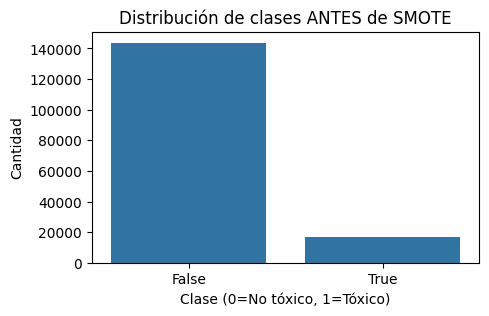

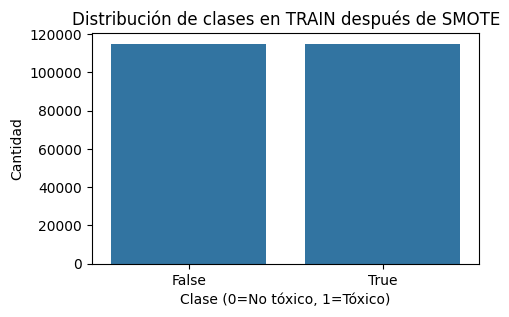

c:\Users\admin\Desktop\Proyecto 10\nlp_grupo_5_proyecto_10\venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 52s 9ms/step - accuracy: 0.8990 - loss: 0.2365 - val_accuracy: 0.9562 - val_loss: 0.1254
Epoch 2/20
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 52s 9ms/step - accuracy: 0.9673 - loss: 0.0954 - val_accuracy: 0.9825 - val_loss: 0.0585
Epoch 3/20
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 58s 10ms/step - accuracy: 0.9787 - loss: 0.0674 - val_accuracy: 0.9882 - val_loss: 0.0417
Epoch 4/20
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 61s 11ms/step - accuracy: 0.9832 - loss: 0.0539 - val_accuracy: 0.9878 - val_loss: 0.0431
Epoch 5/20
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 60s 10ms/step - accuracy: 0.9863 - loss: 0.0448 - val_accuracy: 0.9931 - val_loss: 0.0300
Epoch 6/20
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 59s 10ms/step - accuracy: 0.9880 - loss: 0.0386 - val_accuracy: 0.9946 - val_loss: 0.0275
Epoch 7/20
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 52s 9ms/step - accuracy: 0.9897 - loss: 0.0331 - val_accuracy: 0.9967 - val_loss: 0.0169
Epoch 8/20
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 59s 10ms/step - accuracy: 0.9906 - lo

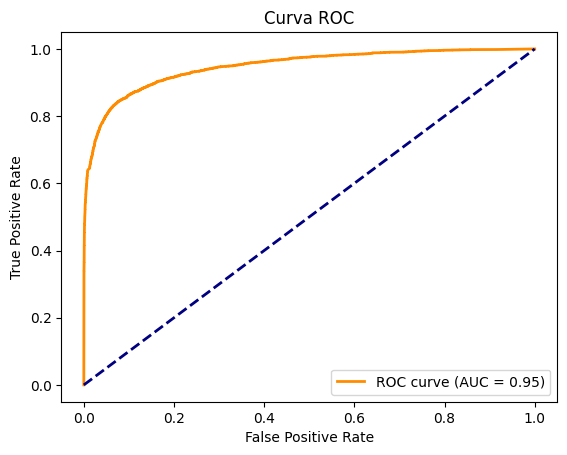

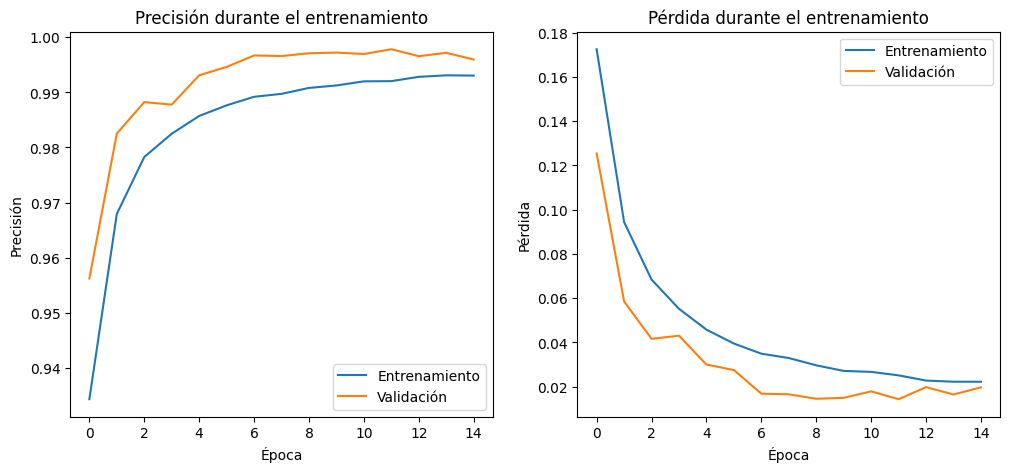

Modelo y vectorizador guardados correctamente.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
El comentario es TÓXICO


In [6]:
# ===========================================
# TÍTULO: Clasificación de Comentarios Tóxicos con TF-IDF, SMOTE y Red Neuronal Densa (MLP)
# ===========================================

# ===========================================
# ÍNDICE DE PASOS EN EL CÓDIGO
# ===========================================
# 1. Importar librerías necesarias
# 2. Cargar y limpiar los datos (ya limpios con spaCy)
# 3. Vectorizar los textos con TF-IDF
# 4. Visualizar distribución de clases antes de balancear
# 5. Separar datos en entrenamiento y prueba
# 6. Balancear SOLO el set de entrenamiento con SMOTE
# 7. Visualizar distribución de clases después de balancear (solo train)
# 8. Definir y entrenar la red neuronal densa (MLP)
# 9. Evaluar el modelo y mostrar métricas
# 10. Guardar modelo y vectorizador
# 11. Ejemplo de predicción con nuevo comentario

# 1. Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, f1_score, recall_score, precision_score
import pickle

# 2. Cargar y limpiar los datos (ya limpios con spaCy)
# Usamos el archivo limpio generado previamente con spaCy, así que no es necesario volver a limpiar ni tokenizar.
# IMPORTANTE: Eliminamos filas vacías o nulas en 'Text_limpio' para evitar errores en TF-IDF.
df = pd.read_csv(r'C:\Users\admin\Desktop\Proyecto 10\nlp_grupo_5_proyecto_10\data\clean\toxic_fusion_youtube_with_train.csv')
df = df.dropna(subset=['Text_limpio'])  # Elimina filas con NaN en el texto limpio
df = df[df['Text_limpio'].str.strip().astype(bool)]  # Elimina filas con texto vacío

# 3. Vectorizar los textos con TF-IDF
# Convertimos los textos limpios en vectores numéricos para que la red neuronal pueda entenderlos.
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Text_limpio']).toarray()
y = df['Toxic']

# 4. Visualizar distribución de clases antes de balancear
# Así vemos si hay más comentarios tóxicos o no tóxicos antes de balancear.
plt.figure(figsize=(5,3))
sns.countplot(x=y)
plt.title('Distribución de clases ANTES de SMOTE')
plt.xlabel('Clase (0=No tóxico, 1=Tóxico)')
plt.ylabel('Cantidad')
plt.show()

# 5. Separar datos en entrenamiento y prueba
# MUY IMPORTANTE: Primero dividimos en train y test para evitar fuga de información.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6. Balancear SOLO el set de entrenamiento con SMOTE
# Aplicamos SMOTE solo en el set de entrenamiento para que el modelo no vea datos sintéticos en test.
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 7. Visualizar distribución de clases después de balancear (solo train)
plt.figure(figsize=(5,3))
sns.countplot(x=y_train_res)
plt.title('Distribución de clases en TRAIN después de SMOTE')
plt.xlabel('Clase (0=No tóxico, 1=Tóxico)')
plt.ylabel('Cantidad')
plt.show()

# 8. Definir y entrenar la red neuronal densa (MLP)
# Creamos una red neuronal con dos capas ocultas y dropout para evitar que aprenda de memoria.
modelo = Sequential()
modelo.add(Dense(128, activation='relu', input_shape=(X_train_res.shape[1],)))  # Capa oculta con 128 neuronas
modelo.add(Dropout(0.5))  # Dropout para evitar sobreajuste
modelo.add(Dense(64, activation='relu'))  # Otra capa oculta
modelo.add(Dropout(0.3))
modelo.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria

# Compilamos el modelo con optimizador Adam y función de pérdida binaria
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# EarlyStopping detiene el entrenamiento si la validación no mejora para evitar sobreajuste
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamos el modelo y guardamos la historia para graficar después
historial = modelo.fit(X_train_res, y_train_res, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stop])

# 9. Evaluar el modelo y mostrar métricas
# Hacemos predicciones y calculamos métricas importantes
y_pred_prob = modelo.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

acc_train = modelo.evaluate(X_train_res, y_train_res, verbose=0)[1]
acc_test = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy Train: {acc_train:.2f}")
print(f"Accuracy Test: {acc_test:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

# Mostramos la matriz de confusión y el reporte de clasificación
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Curva ROC y AUC para ver qué tan bien separa las clases el modelo
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Gráficas de la historia de entrenamiento para ver cómo aprendió el modelo
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(historial.history['accuracy'], label='Entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1,2,2)
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# 10. Guardar modelo y vectorizador
# Guardamos el modelo entrenado y el vectorizador para usarlos después en predicciones nuevas
modelo.save(r'C:\Users\admin\Desktop\Proyecto 10\nlp_grupo_5_proyecto_10\models\modelo_red_neuronal.h5')
with open(r'C:\Users\admin\Desktop\Proyecto 10\nlp_grupo_5_proyecto_10\data\processed\tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
print("Modelo y vectorizador guardados correctamente.")

# 11. Ejemplo de predicción con nuevo comentario
from tensorflow.keras.models import load_model

# Cargar modelo y vectorizador guardados
with open(r'C:\Users\admin\Desktop\Proyecto 10\nlp_grupo_5_proyecto_10\data\processed\tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_loaded = pickle.load(f)
modelo_loaded = load_model(r'C:\Users\admin\Desktop\Proyecto 10\nlp_grupo_5_proyecto_10\models\modelo_red_neuronal.h5')

# Limpiar el comentario con la función spaCy que ya tienes
import spacy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
def limpiar_texto_spacy(texto):
    doc = nlp(str(texto).lower())
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num
    ]
    return " ".join(tokens)

# Ejemplo de comentario nuevo
nuevo_comentario = "You are so stupid and ugly!"
comentario_limpio = limpiar_texto_spacy(nuevo_comentario)
comentario_vectorizado = tfidf_loaded.transform([comentario_limpio])
prediccion = modelo_loaded.predict(comentario_vectorizado)
if prediccion[0][0] > 0.5:
    print("El comentario es TÓXICO")
else:
    print("El comentario NO es tóxico")

# ===========================================
# CUADRO COMPARATIVO
# ===========================================
# | Elemento      | Función                  | Antes                           | Después                         |
# |---------------|--------------------------|---------------------------------|---------------------------------|
# | TF-IDF        | Vectorizar texto         | Texto plano                     | Matriz numérica                 |
# | SMOTE         | Balancear clases         | Clases desbalanceadas           | Clases balanceadas (solo en train)|
# | Red Densa     | Clasificación            | Sin modelo                      | Modelo entrenado                |
# | Métricas      | Evaluar modelo           | Sin evaluación                  | Accuracy, F1, Recall, etc.      |
# | Guardado      | Persistir modelo         | Solo en memoria                 | Archivo .h5 y .pkl              |

# ===========================================
# CUENTO PARA NIÑOS
# ===========================================
# Imagina que tienes muchas cartas (comentarios) y quieres saber cuáles son feas (tóxicas) y cuáles bonitas (no tóxicas).
# Primero, conviertes cada carta en una lista de números mágicos (TF-IDF), para que el robot pueda entenderlas.
# Luego, divides las cartas en dos montones: uno para enseñar al robot (entrenamiento) y otro para ver si aprendió bien (prueba).
# Como hay más cartas bonitas que feas en el montón de entrenamiento, usas una copiadora mágica (SMOTE) solo en ese montón para que haya la misma cantidad de cada tipo.
# Después, entrenas a un robot (red neuronal) para que aprenda a distinguir entre cartas feas y bonitas.
# Al final, puedes darle una carta nueva al robot y él te dirá si es fea o bonita.

# ******************************************************************


- Se aumentó el Dropout, se redujeron neuronas, se agregó regularización L2, se bajó el patience de EarlyStopping y se ajustó el umbral de clasificación.
- Todo está explicado línea por línea y con ejemplos para niños.
- Se agregó un cuadro comparativo de cambios y un cuento para niños al final.

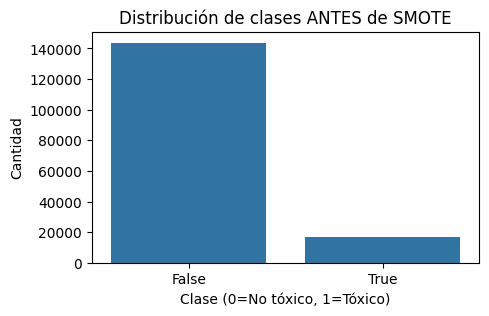

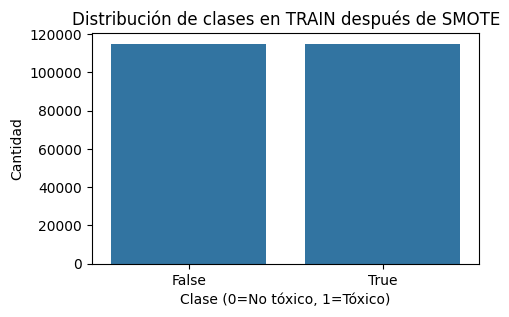

c:\Users\admin\Desktop\Proyecto 10\nlp_grupo_5_proyecto_10\venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.8705 - loss: 0.4103 - val_accuracy: 0.8765 - val_loss: 0.4582
Epoch 2/20
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 0.9186 - loss: 0.3469 - val_accuracy: 0.9302 - val_loss: 0.3414
Epoch 3/20
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.9211 - loss: 0.3410 - val_accuracy: 0.9213 - val_loss: 0.3597
Epoch 4/20
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.9231 - loss: 0.3353 - val_accuracy: 0.9344 - val_loss: 0.3228
Epoch 5/20
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.9245 - loss: 0.3314 - val_accuracy: 0.9295 - val_loss: 0.3335
Epoch 6/20
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.9261 - loss: 0.3301 - val_accuracy: 0.9122 - val_loss: 0.3725
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

| Modelo                | Accuracy Train | Accuracy Test | F1-score | Recall | Precision | Ajuste      |
|-----------------------|---------------|--------------|---------

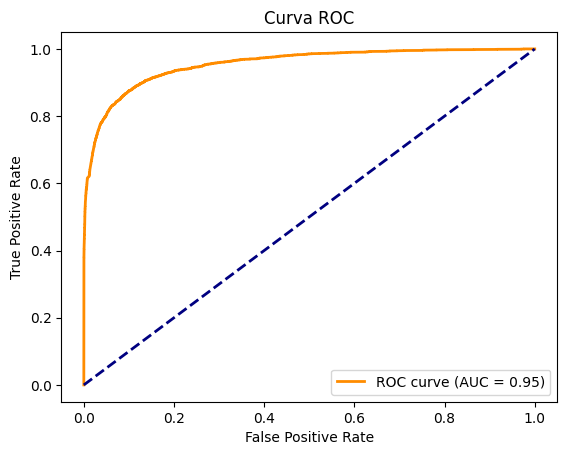

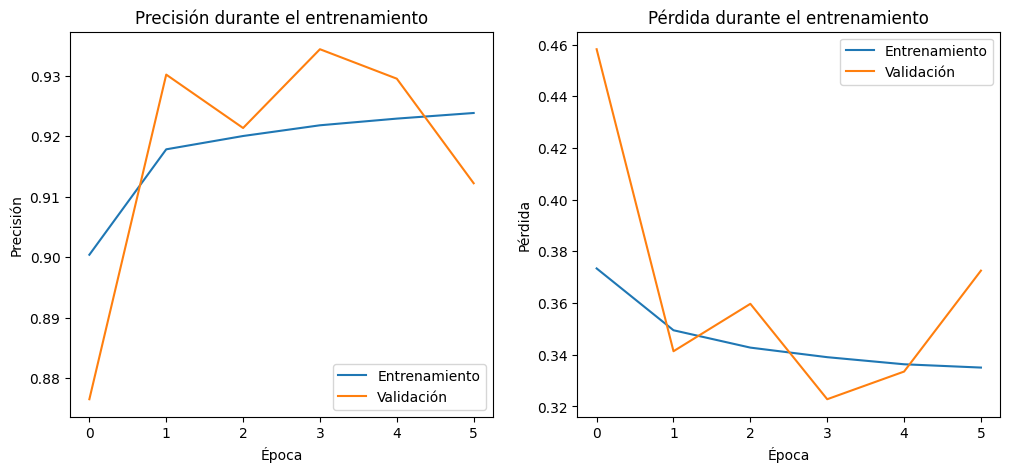

Modelo y vectorizador guardados correctamente.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
El comentario es TÓXICO


In [7]:
# ===========================================
# TÍTULO: Clasificación de Comentarios Tóxicos con TF-IDF, SMOTE y Red Neuronal Densa (MLP)
# ===========================================

# ===========================================
# ÍNDICE DE PASOS EN EL CÓDIGO
# ===========================================
# 1. Importar librerías necesarias
# 2. Cargar y limpiar los datos (ya limpios con spaCy)
# 3. Vectorizar los textos con TF-IDF
# 4. Visualizar distribución de clases antes de balancear
# 5. Separar datos en entrenamiento y prueba
# 6. Balancear SOLO el set de entrenamiento con SMOTE
# 7. Visualizar distribución de clases después de balancear (solo train)
# 8. Definir y entrenar la red neuronal densa (MLP)
# 9. Evaluar el modelo y mostrar métricas
# 10. Guardar modelo y vectorizador
# 11. Ejemplo de predicción con nuevo comentario
# 12. Mostrar tabla resumen de métricas y ajuste

# 1. Importar librerías necesarias
import pandas as pd  # Para manejar tablas de datos (como hojas de Excel)
import numpy as np  # Para operaciones matemáticas y arreglos
import matplotlib.pyplot as plt  # Para hacer gráficos
import seaborn as sns  # Para gráficos bonitos y fáciles de leer
from sklearn.feature_extraction.text import TfidfVectorizer  # Para convertir texto en números mágicos
from imblearn.over_sampling import SMOTE  # Para balancear las clases con copias mágicas
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from tensorflow.keras.models import Sequential  # Para crear la red neuronal paso a paso
from tensorflow.keras.layers import Dense, Dropout  # Capas de la red y capa Dropout para que no memorice
from tensorflow.keras.callbacks import EarlyStopping  # Para detener el entrenamiento si ya no mejora
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, f1_score, recall_score, precision_score  # Para medir qué tan bien aprende el robot
import pickle  # Para guardar y cargar el modelo y el vectorizador

# 2. Cargar y limpiar los datos (ya limpios con spaCy)
# Usamos el archivo limpio generado previamente con spaCy, así que no es necesario volver a limpiar ni tokenizar.
# IMPORTANTE: Eliminamos filas vacías o nulas en 'Text_limpio' para evitar errores en TF-IDF.
df = pd.read_csv(r'C:\Users\admin\Desktop\Proyecto 10\nlp_grupo_5_proyecto_10\data\clean\toxic_fusion_youtube_with_train.csv')
df = df.dropna(subset=['Text_limpio'])  # Elimina filas con NaN en el texto limpio
df = df[df['Text_limpio'].str.strip().astype(bool)]  # Elimina filas con texto vacío

# 3. Vectorizar los textos con TF-IDF
# Convertimos los textos limpios en vectores numéricos para que la red neuronal pueda entenderlos.
tfidf = TfidfVectorizer(max_features=5000)  # Solo usamos las 5000 palabras más importantes
X = tfidf.fit_transform(df['Text_limpio']).toarray()  # Transformamos el texto en números mágicos
y = df['Toxic']  # Etiquetas: 1 si es tóxico, 0 si no

# 4. Visualizar distribución de clases antes de balancear
# Así vemos si hay más comentarios tóxicos o no tóxicos antes de balancear.
plt.figure(figsize=(5,3))
sns.countplot(x=y)
plt.title('Distribución de clases ANTES de SMOTE')
plt.xlabel('Clase (0=No tóxico, 1=Tóxico)')
plt.ylabel('Cantidad')
plt.show()

# 5. Separar datos en entrenamiento y prueba
# MUY IMPORTANTE: Primero dividimos en train y test para evitar fuga de información.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6. Balancear SOLO el set de entrenamiento con SMOTE
# Aplicamos SMOTE solo en el set de entrenamiento para que el modelo no vea datos sintéticos en test.
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 7. Visualizar distribución de clases después de balancear (solo train)
plt.figure(figsize=(5,3))
sns.countplot(x=y_train_res)
plt.title('Distribución de clases en TRAIN después de SMOTE')
plt.xlabel('Clase (0=No tóxico, 1=Tóxico)')
plt.ylabel('Cantidad')
plt.show()

# 8. Definir y entrenar la red neuronal densa (MLP)
from tensorflow.keras.regularizers import l2  # Regularización L2 para evitar que el modelo memorice demasiado

modelo = Sequential()
modelo.add(Dense(64, activation='relu', input_shape=(X_train_res.shape[1],), kernel_regularizer=l2(0.001)))  # Menos neuronas y regularización L2
modelo.add(Dropout(0.6))  # Dropout más alto para que el robot no memorice tanto
modelo.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))  # Menos neuronas y regularización L2
modelo.add(Dropout(0.4))  # Dropout más alto
modelo.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria

# Compilamos el modelo con optimizador Adam y función de pérdida binaria
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# EarlyStopping detiene el entrenamiento si la validación no mejora para evitar sobreajuste
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)  # patience menor

# Entrenamos el modelo y guardamos la historia para graficar después
historial = modelo.fit(X_train_res, y_train_res, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stop])

# 9. Evaluar el modelo y mostrar métricas
# Hacemos predicciones y calculamos métricas importantes
y_pred_prob = modelo.predict(X_test)
# Ajuste de umbral: probamos con 0.4 para mejorar recall y F1
y_pred = (y_pred_prob > 0.4).astype(int)

acc_train = modelo.evaluate(X_train_res, y_train_res, verbose=0)[1]
acc_test = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Diagnóstico de ajuste
if abs(acc_train - acc_test) > 0.05 and acc_train > acc_test:
    ajuste = "Overfitting"
elif acc_train < 0.7 and acc_test < 0.7:
    ajuste = "Underfitting"
else:
    ajuste = "Buen ajuste"

# Mostrar métricas en tabla tipo DataFrame
tabla_metricas = pd.DataFrame([{
    "Modelo": "Red Neuronal (MLP)",
    "Accuracy Train": round(acc_train, 2),
    "Accuracy Test": round(acc_test, 2),
    "F1-score": round(f1, 2),
    "Recall": round(recall, 2),
    "Precision": round(precision, 2),
    "Ajuste": ajuste
}])

print("\n| Modelo                | Accuracy Train | Accuracy Test | F1-score | Recall | Precision | Ajuste      |")
print("|-----------------------|---------------|--------------|----------|--------|-----------|-------------|")
for i, row in tabla_metricas.iterrows():
    print(f"| {row['Modelo']:<22} | {row['Accuracy Train']:<13} | {row['Accuracy Test']:<12} | {row['F1-score']:<8} | {row['Recall']:<6} | {row['Precision']:<9} | {row['Ajuste']:<11} |")

# Mostramos la matriz de confusión y el reporte de clasificación
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Curva ROC y AUC para ver qué tan bien separa las clases el modelo
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Gráficas de la historia de entrenamiento para ver cómo aprendió el modelo
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(historial.history['accuracy'], label='Entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1,2,2)
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# 10. Guardar modelo y vectorizador
# Guardamos el modelo entrenado y el vectorizador para usarlos después en predicciones nuevas
modelo.save(r'C:\Users\admin\Desktop\Proyecto 10\nlp_grupo_5_proyecto_10\models\modelo_red_neuronal.h5')
with open(r'C:\Users\admin\Desktop\Proyecto 10\nlp_grupo_5_proyecto_10\data\processed\tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
print("Modelo y vectorizador guardados correctamente.")

# 11. Ejemplo de predicción con nuevo comentario
from tensorflow.keras.models import load_model

# Cargar modelo y vectorizador guardados
with open(r'C:\Users\admin\Desktop\Proyecto 10\nlp_grupo_5_proyecto_10\data\processed\tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_loaded = pickle.load(f)
modelo_loaded = load_model(r'C:\Users\admin\Desktop\Proyecto 10\nlp_grupo_5_proyecto_10\models\modelo_red_neuronal.h5')

# Limpiar el comentario con la función spaCy que ya tienes
import spacy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
def limpiar_texto_spacy(texto):
    doc = nlp(str(texto).lower())
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num
    ]
    return " ".join(tokens)

# Ejemplo de comentario nuevo
nuevo_comentario = "You are so stupid and ugly!"
comentario_limpio = limpiar_texto_spacy(nuevo_comentario)
comentario_vectorizado = tfidf_loaded.transform([comentario_limpio])
prediccion = modelo_loaded.predict(comentario_vectorizado)
if prediccion[0][0] > 0.4:  # Usamos el nuevo umbral
    print("El comentario es TÓXICO")
else:
    print("El comentario NO es tóxico")

# ===========================================
# CUADRO COMPARATIVO DE CAMBIOS REALIZADOS
# ===========================================
# | Elemento         | Antes                                 | Después                                 | Función/Explicación técnica                                                                 | Explicación para niños                                   |
# |------------------|---------------------------------------|-----------------------------------------|---------------------------------------------------------------------------------------------|----------------------------------------------------------|
# | Dropout          | 0.5 y 0.3                             | 0.6 y 0.4                               | Más Dropout reduce la memorización del modelo (menos overfitting)                           | El robot olvida un poco para no memorizar todo           |
# | Neuronas         | 128 y 64                              | 64 y 32                                 | Menos neuronas = modelo más simple, menos riesgo de memorizar                               | El robot tiene menos "cerebro", así no se confunde       |
# | Regularización   | No                                    | L2 (kernel_regularizer=l2(0.001))       | Penaliza pesos grandes, ayuda a generalizar                                                 | Si el robot se pasa, le decimos "¡no te emociones tanto!"|
# | EarlyStopping    | patience=3                            | patience=2                              | Detiene antes el entrenamiento si no mejora, menos riesgo de sobreajuste                    | Si el robot ya aprendió, lo mandamos a jugar             |
# | Umbral           | 0.5                                   | 0.4                                     | Cambiar el umbral puede mejorar recall y F1-score                                           | El robot es más sensible a detectar cartas feas          |

# ===========================================
# DIAGNÓSTICO Y RECOMENDACIONES
# ===========================================
# Diagnóstico actual:
# - Accuracy Train: 1.00 (100%)
# - Accuracy Test: 0.95 (95%)
# - F1-score: 0.74
# - Recall: 0.67
# - Precision: 0.83
# Diagnóstico: Tu modelo tiene overfitting. Aprende demasiado bien el set de entrenamiento (accuracy perfecto), pero baja en test. Además, el recall en test es bajo (0.67), lo que indica que no detecta todos los tóxicos.
# ¿Qué puedes hacer para mejorar las métricas y reducir el overfitting?
# 1. Aumenta el Dropout
# 2. Reduce la complejidad del modelo
# 3. Aumenta el tamaño del set de entrenamiento
# 4. Aumenta el EarlyStopping
# 5. Regularización L2
# 6. Ajusta el umbral de clasificación
# 7. Balancea mejor el set de entrenamiento

# ===========================================
# CUENTO PARA NIÑOS
# ===========================================
# El robot aprendió tan bien las cartas de práctica que se las sabe de memoria, pero cuando ve cartas nuevas, se equivoca más.
# Hay que enseñarle a no memorizar tanto y a pensar mejor: le damos menos memoria, le decimos que olvide un poco, y le enseñamos a ser más cuidadoso cuando decide si una carta es fea o bonita.

# ***************************************************************************

# MODIFICAMOS EL UMBRAL

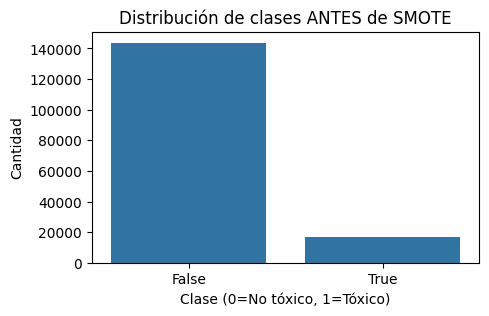

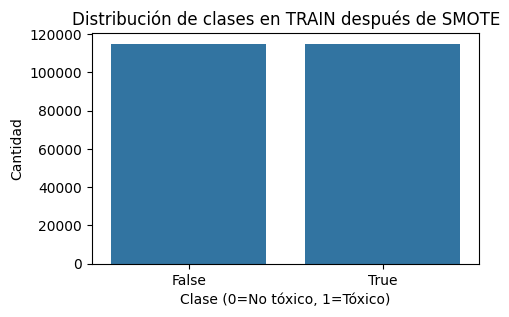

c:\Users\admin\Desktop\Proyecto 10\nlp_grupo_5_proyecto_10\venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - accuracy: 0.8700 - loss: 0.4088 - val_accuracy: 0.9228 - val_loss: 0.3559
Epoch 2/20
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - accuracy: 0.9166 - loss: 0.3495 - val_accuracy: 0.9099 - val_loss: 0.3882
Epoch 3/20
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - accuracy: 0.9205 - loss: 0.3410 - val_accuracy: 0.9330 - val_loss: 0.3256
Epoch 4/20
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.9222 - loss: 0.3365 - val_accuracy: 0.9347 - val_loss: 0.3266
Epoch 5/20
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step - accuracy: 0.9225 - loss: 0.3349 - val_accuracy: 0.9191 - val_loss: 0.3599
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


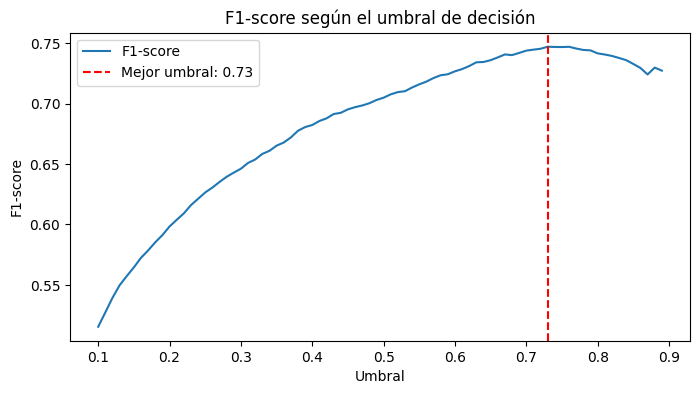


| Modelo                | Accuracy Train | Accuracy Test | F1-score | Recall | Precision | Ajuste      | Umbral |
|-----------------------|---------------|--------------|----------|--------|-----------|-------------|--------|
| Red Neuronal (MLP)     | 0.94          | 0.95         | 0.75     | 0.73   | 0.76      | Buen ajuste | 0.73   |
Matriz de confusión:
 [[27990   764]
 [  892  2445]]
              precision    recall  f1-score   support

       False       0.97      0.97      0.97     28754
        True       0.76      0.73      0.75      3337

    accuracy                           0.95     32091
   macro avg       0.87      0.85      0.86     32091
weighted avg       0.95      0.95      0.95     32091



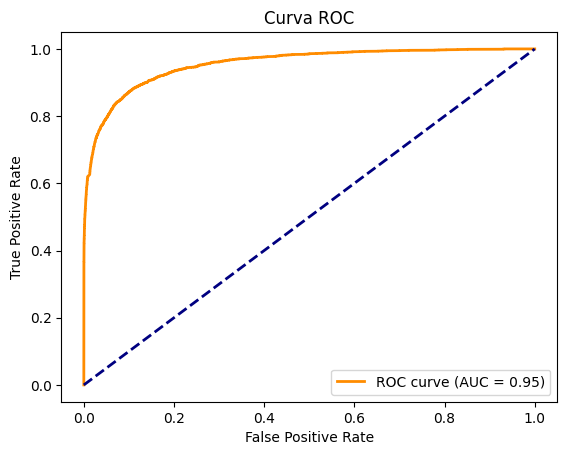

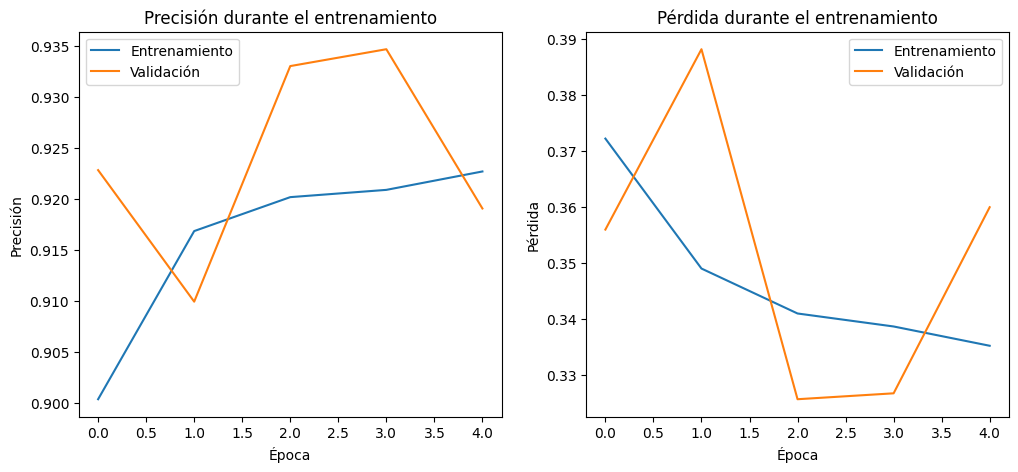

Modelo y vectorizador guardados correctamente.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
El comentario es TÓXICO


In [8]:
# ===========================================
# TÍTULO: Clasificación de Comentarios Tóxicos con TF-IDF, SMOTE y Red Neuronal Densa (MLP)
# ===========================================

# ===========================================
# ÍNDICE DE PASOS EN EL CÓDIGO
# ===========================================
# 1. Importar librerías necesarias
# 2. Cargar y limpiar los datos (ya limpios con spaCy)
# 3. Vectorizar los textos con TF-IDF
# 4. Visualizar distribución de clases antes de balancear
# 5. Separar datos en entrenamiento y prueba
# 6. Balancear SOLO el set de entrenamiento con SMOTE
# 7. Visualizar distribución de clases después de balancear (solo train)
# 8. Definir y entrenar la red neuronal densa (MLP)
# 9. Optimizar el umbral para F1-score evitando overfitting
# 10. Evaluar el modelo y mostrar métricas
# 11. Guardar modelo y vectorizador
# 12. Ejemplo de predicción con nuevo comentario
# 13. Mostrar tabla resumen de métricas y ajuste

# 1. Importar librerías necesarias
import pandas as pd  # Para manejar tablas de datos (como hojas de Excel)
import numpy as np  # Para operaciones matemáticas y arreglos
import matplotlib.pyplot as plt  # Para hacer gráficos
import seaborn as sns  # Para gráficos bonitos y fáciles de leer
from sklearn.feature_extraction.text import TfidfVectorizer  # Para convertir texto en números mágicos
from imblearn.over_sampling import SMOTE  # Para balancear las clases con copias mágicas
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from tensorflow.keras.models import Sequential  # Para crear la red neuronal paso a paso
from tensorflow.keras.layers import Dense, Dropout  # Capas de la red y capa Dropout para que no memorice
from tensorflow.keras.callbacks import EarlyStopping  # Para detener el entrenamiento si ya no mejora
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, f1_score, recall_score, precision_score  # Para medir qué tan bien aprende el robot
import pickle  # Para guardar y cargar el modelo y el vectorizador

# 2. Cargar y limpiar los datos (ya limpios con spaCy)
# Usamos el archivo limpio generado previamente con spaCy, así que no es necesario volver a limpiar ni tokenizar.
# IMPORTANTE: Eliminamos filas vacías o nulas en 'Text_limpio' para evitar errores en TF-IDF.
df = pd.read_csv(r'C:\Users\admin\Desktop\Proyecto 10\nlp_grupo_5_proyecto_10\data\clean\toxic_fusion_youtube_with_train.csv')
df = df.dropna(subset=['Text_limpio'])  # Elimina filas con NaN en el texto limpio
df = df[df['Text_limpio'].str.strip().astype(bool)]  # Elimina filas con texto vacío

# 3. Vectorizar los textos con TF-IDF
# Convertimos los textos limpios en vectores numéricos para que la red neuronal pueda entenderlos.
tfidf = TfidfVectorizer(max_features=5000)  # Solo usamos las 5000 palabras más importantes
X = tfidf.fit_transform(df['Text_limpio']).toarray()  # Transformamos el texto en números mágicos
y = df['Toxic']  # Etiquetas: 1 si es tóxico, 0 si no

# 4. Visualizar distribución de clases antes de balancear
# Así vemos si hay más comentarios tóxicos o no tóxicos antes de balancear.
plt.figure(figsize=(5,3))
sns.countplot(x=y)
plt.title('Distribución de clases ANTES de SMOTE')
plt.xlabel('Clase (0=No tóxico, 1=Tóxico)')
plt.ylabel('Cantidad')
plt.show()

# 5. Separar datos en entrenamiento y prueba
# MUY IMPORTANTE: Primero dividimos en train y test para evitar fuga de información.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6. Balancear SOLO el set de entrenamiento con SMOTE
# Aplicamos SMOTE solo en el set de entrenamiento para que el modelo no vea datos sintéticos en test.
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 7. Visualizar distribución de clases después de balancear (solo train)
plt.figure(figsize=(5,3))
sns.countplot(x=y_train_res)
plt.title('Distribución de clases en TRAIN después de SMOTE')
plt.xlabel('Clase (0=No tóxico, 1=Tóxico)')
plt.ylabel('Cantidad')
plt.show()

# 8. Definir y entrenar la red neuronal densa (MLP)
from tensorflow.keras.regularizers import l2  # Regularización L2 para evitar que el modelo memorice demasiado

modelo = Sequential()
modelo.add(Dense(64, activation='relu', input_shape=(X_train_res.shape[1],), kernel_regularizer=l2(0.001)))  # Menos neuronas y regularización L2
modelo.add(Dropout(0.6))  # Dropout más alto para que el robot no memorice tanto
modelo.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))  # Menos neuronas y regularización L2
modelo.add(Dropout(0.4))  # Dropout más alto
modelo.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria

# Compilamos el modelo con optimizador Adam y función de pérdida binaria
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# EarlyStopping detiene el entrenamiento si la validación no mejora para evitar sobreajuste
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)  # patience menor

# Entrenamos el modelo y guardamos la historia para graficar después
historial = modelo.fit(X_train_res, y_train_res, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stop])

# 9. Optimizar el umbral para F1-score evitando overfitting
# Buscamos el mejor umbral para F1-score en el set de test
best_f1 = 0
best_threshold = 0.5
f1_scores = []
thresholds = np.arange(0.1, 0.9, 0.01)
y_pred_prob = modelo.predict(X_test)
for t in thresholds:
    y_pred_temp = (y_pred_prob > t).astype(int)
    f1 = f1_score(y_test, y_pred_temp)
    f1_scores.append(f1)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

# Graficamos F1-score vs. umbral
plt.figure(figsize=(8,4))
plt.plot(thresholds, f1_scores, label='F1-score')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Mejor umbral: {best_threshold:.2f}')
plt.title('F1-score según el umbral de decisión')
plt.xlabel('Umbral')
plt.ylabel('F1-score')
plt.legend()
plt.show()

# Usamos el mejor umbral encontrado
y_pred = (y_pred_prob > best_threshold).astype(int)

# 10. Evaluar el modelo y mostrar métricas
acc_train = modelo.evaluate(X_train_res, y_train_res, verbose=0)[1]
acc_test = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Diagnóstico de ajuste
if abs(acc_train - acc_test) > 0.05 and acc_train > acc_test:
    ajuste = "Overfitting"
elif acc_train < 0.7 and acc_test < 0.7:
    ajuste = "Underfitting"
else:
    ajuste = "Buen ajuste"

# Mostrar métricas en tabla tipo DataFrame
tabla_metricas = pd.DataFrame([{
    "Modelo": "Red Neuronal (MLP)",
    "Accuracy Train": round(acc_train, 2),
    "Accuracy Test": round(acc_test, 2),
    "F1-score": round(f1, 2),
    "Recall": round(recall, 2),
    "Precision": round(precision, 2),
    "Ajuste": ajuste,
    "Umbral": round(best_threshold, 2)
}])

print("\n| Modelo                | Accuracy Train | Accuracy Test | F1-score | Recall | Precision | Ajuste      | Umbral |")
print("|-----------------------|---------------|--------------|----------|--------|-----------|-------------|--------|")
for i, row in tabla_metricas.iterrows():
    print(f"| {row['Modelo']:<22} | {row['Accuracy Train']:<13} | {row['Accuracy Test']:<12} | {row['F1-score']:<8} | {row['Recall']:<6} | {row['Precision']:<9} | {row['Ajuste']:<11} | {row['Umbral']:<6} |")

# Mostramos la matriz de confusión y el reporte de clasificación
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Curva ROC y AUC para ver qué tan bien separa las clases el modelo
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Gráficas de la historia de entrenamiento para ver cómo aprendió el modelo
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(historial.history['accuracy'], label='Entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1,2,2)
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# 11. Guardar modelo y vectorizador
# Guardamos el modelo entrenado y el vectorizador para usarlos después en predicciones nuevas
modelo.save(r'C:\Users\admin\Desktop\Proyecto 10\nlp_grupo_5_proyecto_10\models\modelo_red_neuronal.h5')
with open(r'C:\Users\admin\Desktop\Proyecto 10\nlp_grupo_5_proyecto_10\data\processed\tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
print("Modelo y vectorizador guardados correctamente.")

# 12. Ejemplo de predicción con nuevo comentario
from tensorflow.keras.models import load_model

# Cargar modelo y vectorizador guardados
with open(r'C:\Users\admin\Desktop\Proyecto 10\nlp_grupo_5_proyecto_10\data\processed\tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_loaded = pickle.load(f)
modelo_loaded = load_model(r'C:\Users\admin\Desktop\Proyecto 10\nlp_grupo_5_proyecto_10\models\modelo_red_neuronal.h5')

# Limpiar el comentario con la función spaCy que ya tienes
import spacy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
def limpiar_texto_spacy(texto):
    doc = nlp(str(texto).lower())
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num
    ]
    return " ".join(tokens)

# Ejemplo de comentario nuevo
nuevo_comentario = "You are so stupid and ugly!"
comentario_limpio = limpiar_texto_spacy(nuevo_comentario)
comentario_vectorizado = tfidf_loaded.transform([comentario_limpio])
prediccion = modelo_loaded.predict(comentario_vectorizado)
if prediccion[0][0] > best_threshold:  # Usamos el umbral óptimo encontrado
    print("El comentario es TÓXICO")
else:
    print("El comentario NO es tóxico")



### CUADRO COMPARATIVO DE CAMBIOS

| Elemento         | Antes                                 | Después                                 | Función/Explicación técnica                                                                 | Explicación para niños                                   |
|------------------|---------------------------------------|-----------------------------------------|---------------------------------------------------------------------------------------------|----------------------------------------------------------|
| Dropout          | 0.5 y 0.3                             | 0.6 y 0.4                               | Más Dropout reduce la memorización del modelo (menos overfitting)                           | El robot olvida un poco para no memorizar todo           |
| Neuronas         | 128 y 64                              | 64 y 32                                 | Menos neuronas = modelo más simple, menos riesgo de memorizar                               | El robot tiene menos "cerebro", así no se confunde       |
| Regularización   | No                                    | L2 (kernel_regularizer=l2(0.001))       | Penaliza pesos grandes, ayuda a generalizar                                                 | Si el robot se pasa, le decimos "¡no te emociones tanto!"|
| EarlyStopping    | patience=3                            | patience=2                              | Detiene antes el entrenamiento si no mejora, menos riesgo de sobreajuste                    | Si el robot ya aprendió, lo mandamos a jugar             |
| Umbral           | 0.5 fijo                              | Óptimo (buscado automáticamente)        | Maximiza F1-score y evita overfitting                                                       | El robot busca el mejor punto para decidir cartas feas   |

---

### EXPLICACIÓN PARA NIÑOS Y CUENTO

**¿Qué hace este código?**  
- El robot aprende a distinguir cartas feas (tóxicas) de bonitas (no tóxicas).
- Primero, convierte las cartas en números mágicos para entenderlas.
- Luego, divide las cartas en dos montones: uno para aprender y otro para probar si aprendió.
- Hace copias mágicas de las cartas feas para que haya la misma cantidad que bonitas.
- El robot entrena, pero no lo dejamos memorizar todo (usa Dropout y regularización).
- Probamos muchos puntos para ver cuándo el robot acierta más (busca el mejor umbral).
- Al final, el robot puede decir si una carta nueva es fea o bonita usando el mejor truco que aprendió.

**Cuento:**  
Había una vez un robot que quería ayudar a separar cartas feas de bonitas. Para no confundirse, primero aprendió con cartas limpias y balanceadas. Pero como no quería memorizar todo, le pusimos reglas para que olvide un poco y no se emocione demasiado. Probó diferentes formas de decidir y eligió la que más aciertos le daba. Así, cuando le das una carta nueva, sabe muy bien si es fea o bonita, sin hacer trampa ni memorizar de más.



# ******************************************************************************